In [1]:
#-----starting libraries
import numpy as np
import pandas as pd
import seaborn as sns
#sns.set(style='darkgrid')
from matplotlib import style
#sta matplotlib to inline and displays graphs below the corresponding cell.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
import warnings
warnings.filterwarnings('ignore')

print("Libraries are successfully loaded :-)")

Libraries are successfully loaded :-)


In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df=df.iloc[:,3:]
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
import pandas_profiling as pp #to statistically / graphically represent
profile = pp.ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [57]:
profile

In [58]:
import sweetviz as sw
my_report= sw.analyze([df,"dataframe"],target_feat='Exited')

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [59]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [63]:
### Check the Data standardisation for any outliers and transform the data to get rid of outliers

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [79]:
## Well tried!! But these all can be done on the Linear Regression Part also to get rid of standard deviation
# df["CreditScore"]=df["CreditScore"].transform(lambda x : np.sqrt(x))
# df["Balance"]=df["Balance"].transform(lambda x :  np.sqrt(x))
# df["EstimatedSalary"]=df["EstimatedSalary"].transform(lambda x :  np.sqrt(x))
# df.describe().T

In [5]:
from autoplotter import run_app
run_app(df, mode='inline')
# run_app(df,mode='external')

In [3]:
## we need to do feature preprocessing techniques as some of the features are of categorical needs to be turn in discrete
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df=pd.get_dummies(df,columns=["Geography"],drop_first=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

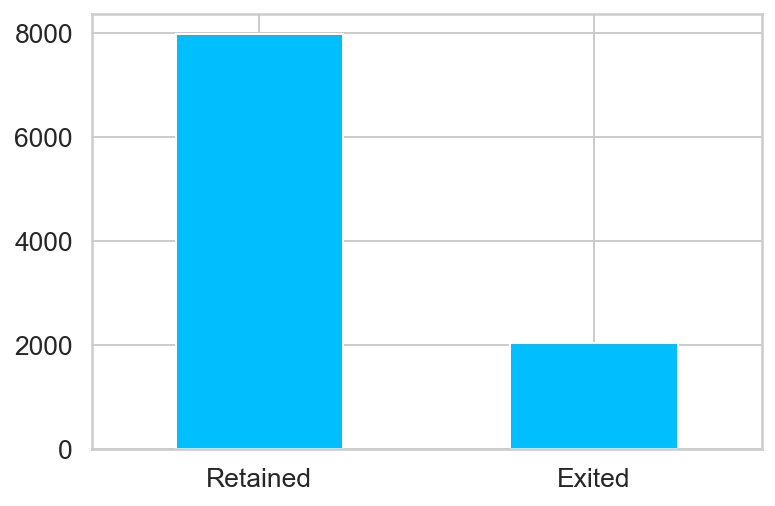

In [13]:
df.Exited.value_counts().rename({0:"Retained",1:'Exited'}).plot.bar(rot=0)

In [14]:
#As we can see that the data is unbalanced, as a matter of fact we need to do SMOTE Analysis
from imblearn.over_sampling import SMOTE

In [15]:
from sklearn.model_selection import train_test_split

y = df.Exited
X = df.drop('Exited', axis=1)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [17]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

Frequency of unique values of the said array:


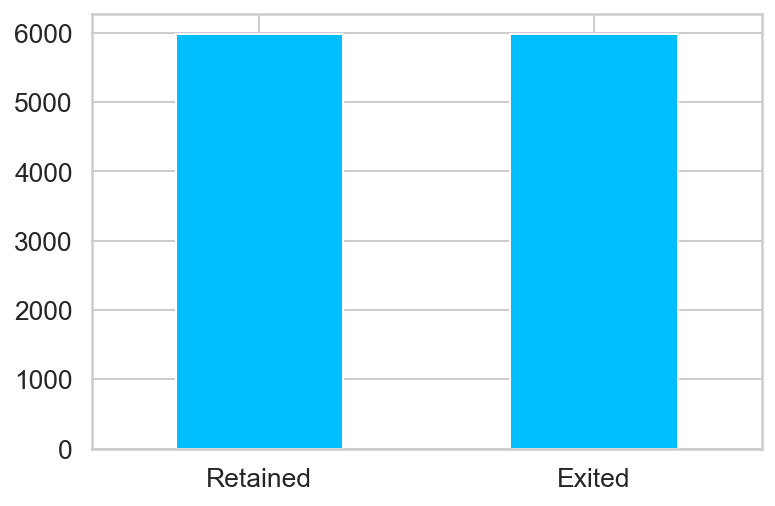

In [42]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
d=pd.DataFrame(np.array((unique_elements, counts_elements))).iloc[1]
d.rename({0:"Retained",1:'Exited'}).plot.bar(rot=0)

In [ ]:
#We got the balanced Data, and now we are ready to go to build model

In [43]:
se=StandardScaler()
X_train=se.fit_transform(X_train)
X_test=se.transform(X_test)
# print(g)
# d=se.inverse_transform(g)



#### Hyper Parameter Tuning

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score

In [49]:
#Decision Tree
dt=DecisionTreeClassifier(random_state=0)
#finding out the most optimal estimator
params={'criterion':['entropy','gini']}
gdt=GridSearchCV(dt,param_grid=params,cv=10,scoring='roc_auc')
gdt.fit(X_train,y_train)
gdt.best_params_

{'criterion': 'entropy'}

In [58]:
rf_var=[]
for val in np.arange(1,50):
    rf=RandomForestClassifier(criterion='entropy',n_estimators=val,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3, random_state=0)
    cv_results = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='roc_auc')
    rf_var.append(np.var(cv_results,ddof=1))
    print(val,np.var(cv_results,ddof=1))

1 1.2309297557221959e-05
2 4.153670028498628e-06
3 1.0749478973779674e-05
4 1.096883182165704e-06
5 6.295874139167492e-06
6 5.217177211023029e-06
7 5.890541765500737e-06
8 5.012764018157412e-06
9 1.2249405004558239e-05
10 7.760152425943688e-06
11 8.44508596863894e-06
12 9.633377768753681e-06
13 6.676376423604584e-06
14 7.161549351807054e-06
15 5.046138704570767e-06
16 4.3879058800366555e-06
17 6.32960978633638e-06
18 2.395916931353172e-06
19 1.9059469238911603e-06
20 3.647571886991577e-06
21 3.49313121071671e-06
22 2.8893219184587756e-06
23 2.5671875696496458e-06
24 2.2924126386509475e-06
25 2.6498617066319777e-06
26 4.383635740030619e-06
27 4.777190195879443e-06
28 4.74574519113484e-06
29 5.9050010262894535e-06
30 7.775242825002558e-06
31 7.623597272811849e-06
32 8.266652357862388e-06
33 8.391147353488752e-06
34 8.022863806829017e-06
35 8.094274250141184e-06
36 8.21441463067635e-06
37 7.2212998185934675e-06
38 8.267263259511229e-06
39 7.548764121520655e-06
40 8.991403442792773e-06
41 

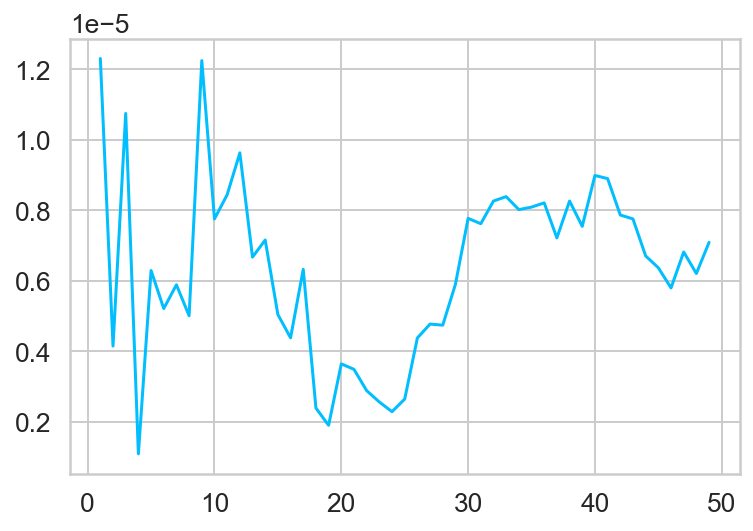

In [59]:
x_axis=np.arange(1,50)
plt.plot(x_axis,rf_var)

In [69]:
rfc=RandomForestClassifier(n_estimators=10,random_state=0)
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [66]:
from sklearn.metrics import roc_curve,auc,confusion_matrix,accuracy_score

classifiers=[
       ['Decision Tree Classification :',DecisionTreeClassifier(criterion='entropy',random_state=0)],
       ['Random Forest Classification :',RandomForestClassifier(n_estimators=10,random_state=0)],
        
       ]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

Decision Tree Classification : 0.7508
Random Forest Classification : 0.8072


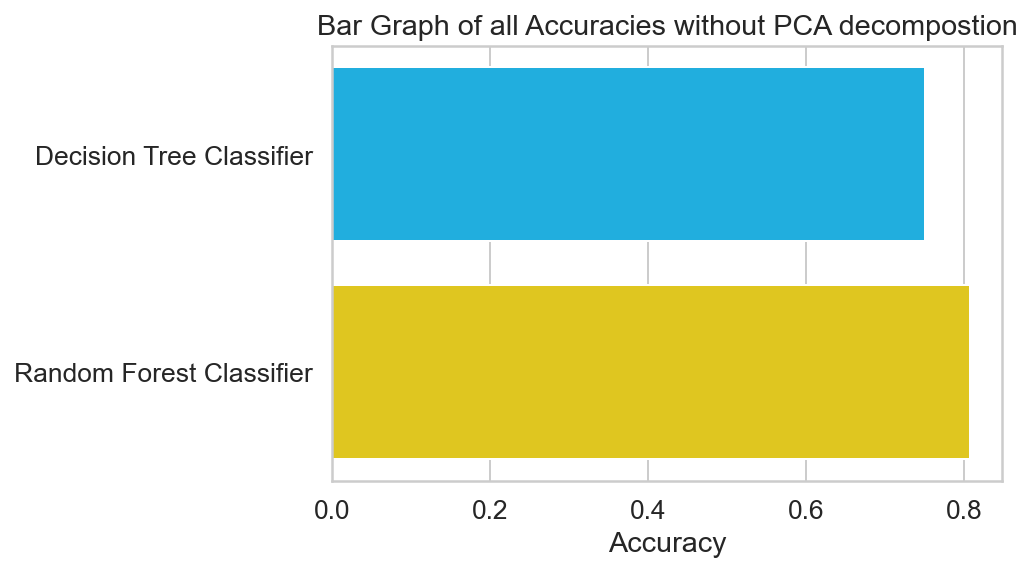

<Figure size 720x576 with 0 Axes>

In [67]:

y_ax=[
      'Decision Tree Classifier',
      'Random Forest Classifier']
x_ax=cla_pred


sns.barplot(x=x_ax,y=y_ax, ci=accuracy_score)
plt.xlabel('Accuracy')
plt.title('Bar Graph of all Accuracies without PCA decompostion')
plt.figure(figsize=(10,8))
plt.savefig("Bar Graph wihtout PCA")

In [68]:
#Saving the model
import pickle as pk

In [70]:
file="randomforest_model.pkl"
model=pk.dump(rfc,open(file,'wb'))

In [72]:
procfile=open("procfile",'wb')